# ***Instalacja potrzebnych komponentów***

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


# ***Probrel minimalizacji strat mocy w układzie***
Dobranie odpowiednich wartości rezystancji by zminimalizować całkowitą stratę mocy na układzie.
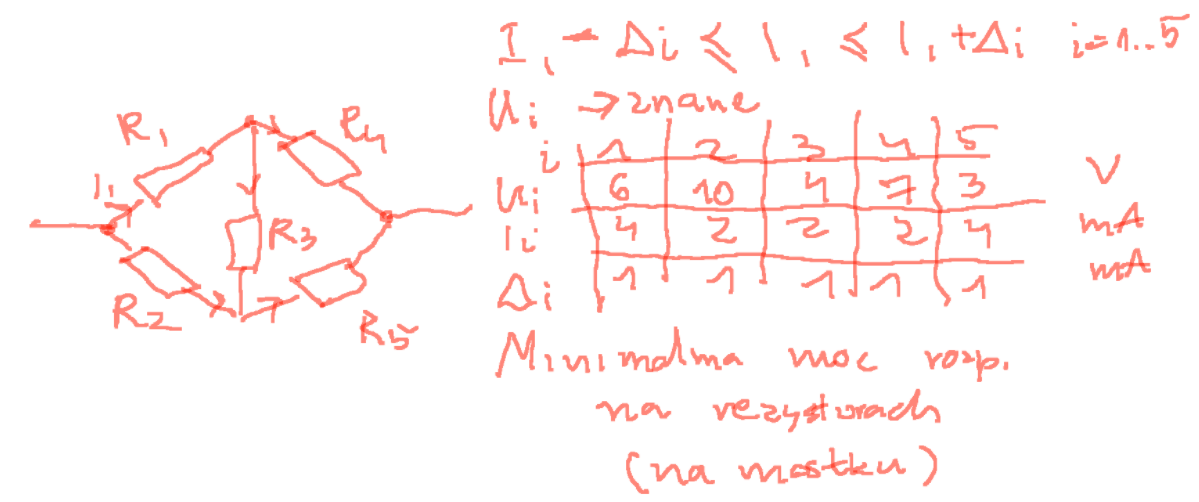
Jako ograniczenia stosujemy prądowe prawo Kirchhoffa jak i nałożone limity prądu

In [ ]:
from pulp import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

Rx = [["R1",6],["R2",10],["R3",4],["R4",7],["R5",3]]
prob = LpProblem("Min_stara_mocy",LpMinimize)

i1 = LpVariable("Prad_1",3,5)
i2 = LpVariable("Prad_2",1,3)
i3 = LpVariable("Prad_3",1,3)
i4 = LpVariable("Prad_4",1,3)
i5 = LpVariable("Prad_5",3,5)

prob += 6*i1 + 10*i2 + 4*i3 + 7*i4 + 3*i5, "Moc"

prob += i1+i2 == i4+i5
prob += i1 == i3+i4
prob += i2 == i5-i3
prob.writeLP("min_starty.lp")
prob.solve()
print ("Status:", LpStatus[prob.status])
print("Starata mocy =",value(prob.objective),"mW")
for i,v in enumerate(prob.variables()):
    print(Rx[i][0], " = ", Rx[i][1]/v.varValue,"kΩ"," => ",v.name, "=", v.varValue, "mA")
    


Status: Optimal
Starata mocy = 52.0 mW
R1  =  2.0 kΩ  =>  Prad_1 = 3.0 mA
R2  =  10.0 kΩ  =>  Prad_2 = 1.0 mA
R3  =  2.0 kΩ  =>  Prad_3 = 2.0 mA
R4  =  7.0 kΩ  =>  Prad_4 = 1.0 mA
R5  =  1.0 kΩ  =>  Prad_5 = 3.0 mA
